#THE CLEANED DATASET WILL BE USED
Checking Demographics based on Age and gender, Split Column into age group,gender  among others, and Find unique values of the demographics column.


In [ ]:
 #Financial Inclusion in Nigeria
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import file from laptop
from google.colab import files
uploaded = files.upload()

Saving data2.csv to data2.csv


columns_to_keep = [
    'state',
    'bank_account_ownership',
    'financial_inclusion_metrics',
    'demographic_factors',
    'savings_behavior',
    'borrowing_behavior',
    'digital_payment_adoption',
    'access_to_electricity',
    'internet_access',
    'mobile_phone_usage',
    'credit_access',
    'small_business_ownership',
    'entrepreneurship'
]




In [3]:
#read csv file into dataframe
df = pd.read_csv('data2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        28392 non-null  object 
 1   bank_account_ownership       28392 non-null  float64
 2   financial_inclusion_metrics  28392 non-null  int64  
 3   demographic_factors          28392 non-null  object 
 4   savings_behavior             28392 non-null  object 
 5   borrowing_behavior           28392 non-null  object 
 6   digital_payment_adoption     28392 non-null  object 
 7   access_to_electricity        28392 non-null  object 
 8   internet_access              28392 non-null  object 
 9   mobile_phone_usage           28392 non-null  object 
 10  credit_access                28392 non-null  object 
 11  small_business_ownership     28392 non-null  object 
 12  entrepreneurship             28392 non-null  object 
dtypes: float64(1), i

In [5]:
#Chck for the unique value in demographics column
df['demographic_factors'].unique()
# split each demographic features into (Age group, Gender, Education level,
# income level, household type)

array(['Adult, Female, Medium Education, Middle Income, Small Household',
       'Adult, Male, Medium Education, Middle Income, Small Household',
       'Adult, Male, Low Education, Middle Income, Small Household',
       'Adult, Male, Medium Education, Low Income, Small Household',
       'Youth, Male, Medium Education, Low Income, Small Household',
       'Adult, Female, Medium Education, High Income, Small Household',
       'Adult, Female, Low Education, Middle Income, Small Household',
       'Youth, Female, Medium Education, High Income, Small Household',
       'Youth, Female, Medium Education, Middle Income, Small Household',
       'Adult, Female, Medium Education, Low Income, Small Household',
       'Youth, Male, Medium Education, Middle Income, Small Household',
       'Youth, Male, Medium Education, High Income, Small Household',
       'Adult, Female, Low Education, Low Income, Small Household',
       'Youth, Male, Low Education, Middle Income, Small Household',
       '

In [6]:
# split each demographic_factors column  into (Age group, Gender, Education level,
# income level, household type)

# Split the 'demographic_factors' column
df[['Age group', 'Gender', 'Education level', 'Income level', 'Household type']] = df['demographic_factors'].str.split(',', expand=True)

# Remove leading/trailing whitespace from the new columns
for col in ['Age group', 'Gender', 'Education level', 'Income level', 'Household type']:
    df[col] = df[col].str.strip()

# Display the updated DataFrame (optional)
print(df.head())


  state  bank_account_ownership  financial_inclusion_metrics  \
0  ABIA                     0.0                            2   
1  ABIA                     0.0                            2   
2  ABIA                     0.0                            2   
3  ABIA                     0.0                            1   
4  ABIA                     0.0                            1   

                                 demographic_factors savings_behavior  \
0  Adult, Female, Medium Education, Middle Income...    Does Not Save   
1  Adult, Female, Medium Education, Middle Income...    Does Not Save   
2  Adult, Male, Medium Education, Middle Income, ...    Saves at Home   
3  Adult, Male, Medium Education, Middle Income, ...    Does Not Save   
4  Adult, Male, Low Education, Middle Income, Sma...    Does Not Save   

                  borrowing_behavior  \
0  Does Not Borrow, Purpose: Unknown   
1  Does Not Borrow, Purpose: Unknown   
2  Does Not Borrow, Purpose: Unknown   
3  Does Not Borr

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        28392 non-null  object 
 1   bank_account_ownership       28392 non-null  float64
 2   financial_inclusion_metrics  28392 non-null  int64  
 3   demographic_factors          28392 non-null  object 
 4   savings_behavior             28392 non-null  object 
 5   borrowing_behavior           28392 non-null  object 
 6   digital_payment_adoption     28392 non-null  object 
 7   access_to_electricity        28392 non-null  object 
 8   internet_access              28392 non-null  object 
 9   mobile_phone_usage           28392 non-null  object 
 10  credit_access                28392 non-null  object 
 11  small_business_ownership     28392 non-null  object 
 12  entrepreneurship             28392 non-null  object 
 13  Age group       

In [8]:
#Drop demographic_factors
#Dropping features that can cause leakage while using the clustering algorithm

leaky_features = ['financial_inclusion_metrics','bank_account_ownership', 'credit_access','demographic_factors']
df_cluster = df.drop(columns=leaky_features) #Dataframe for clustering algorithm


In [9]:
#Checking  the dataframe

df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   state                     28392 non-null  object
 1   savings_behavior          28392 non-null  object
 2   borrowing_behavior        28392 non-null  object
 3   digital_payment_adoption  28392 non-null  object
 4   access_to_electricity     28392 non-null  object
 5   internet_access           28392 non-null  object
 6   mobile_phone_usage        28392 non-null  object
 7   small_business_ownership  28392 non-null  object
 8   entrepreneurship          28392 non-null  object
 9   Age group                 28392 non-null  object
 10  Gender                    28392 non-null  object
 11  Education level           28392 non-null  object
 12  Income level              28392 non-null  object
 13  Household type            28392 non-null  object
dtypes: object(14)
memory u

In [10]:
#To use kmeans algorithm, all featurrs must be numerical thus wewill convert allfeatures to numerical
#State feature: feature hasihng willl be used due to its high dmensionallity
#onehot encode state
df_cluster_state = pd.get_dummies(df_cluster['state'], prefix='state')
#onehot encode other categories
other_col =['digital_payment_adoption','access_to_electricity','internet_access','mobile_phone_usage','small_business_ownership','entrepreneurship']
df_cluster_other =pd.get_dummies(df[other_col], drop_first = True)



In [11]:
#assign colums for label encoding, this type of features are usually the one in order eg education level etc
label_col =['Age group','Education level', 'Income level','Household type','savings_behavior','borrowing_behavior', 'Gender']

In [12]:
#applying ordinal encoding to the other columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in label_col:
    df_cluster[col] = le.fit_transform(df_cluster[col])


In [13]:
df_cluster_label = df_cluster[col]

In [14]:
#Combine all encoded features in a datagrame
df_encode = pd.concat([df_cluster_state,df_cluster_other,df_cluster_label], axis =1)

In [15]:
#Normalize all the features

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encode)


In [16]:

#Import KMeans library
from sklearn.cluster import KMeans


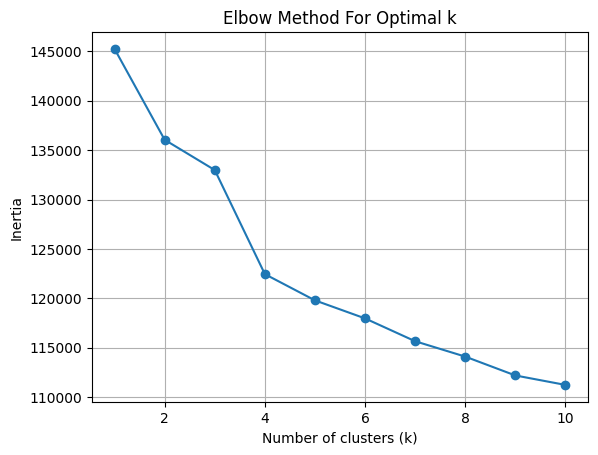

In [17]:
# List of the 20 most useful columns (replace with your actual column names)
'''useful_columns = ['digital_payment_adoption','access_to_electricity','internet_access',
                  'mobile_phone_usage','small_business_ownership','entrepreneurship',
                 'Age group','Education level', 'Income level','Household type',
                  'savings_behavior','borrowing_behavior', 'Gender','state' ]'''
#Check for missing values/rows
df_encode.isna().sum()


#Create the feature matrix X
X = df_encode.dropna()




# Create an empty list to store inertia values to check for the best k(number of clusters)
inertia = []

# Try different numbers of clusters (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


##**KMeans Clustering Algorithm**
From the diagram above, the bend in the elbow occurs at k = 4, thus we will choose 4 clusters for the Kmeans algorithm.

In [18]:
# Create a KMeans model with 4 clusters since the bend in k above is at k = 4
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit (train) the model
df_encode['cluster'] = kmeans.fit_predict(df_scaled)



###Visualization of the Clustering Algorithm


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components for dimension reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Add PCA results to DataFrame for plotting
df_encode['pca1'] = pca_result[:, 0]
df_encode['pca2'] = pca_result[:, 1]





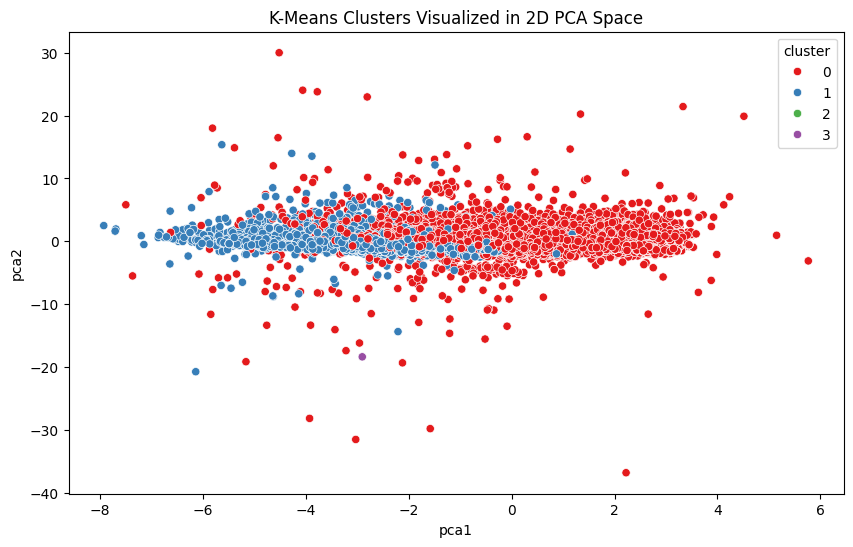

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encode, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title('K-Means Clusters Visualized in 2D PCA Space')
plt.show()


In [21]:
#Summarize clusters
cluster_summary = df_encode.groupby('cluster').mean()
print(cluster_summary)


         state_ABIA  state_ADAMAWA  state_AKWA IBOM  state_ANAMBRA  \
cluster                                                              
0          0.031818       0.030113         0.030321       0.029988   
1          0.004141       0.014493         0.010122       0.012422   
2          0.000000       1.000000         0.000000       0.000000   
3          0.000000       0.000000         0.000000       0.000000   

         state_BAUCHI  state_BAYELSA  state_BENUE  state_BORNO  \
cluster                                                          
0            0.028782       0.030653     0.030071     0.029115   
1            0.015183       0.007131     0.014493     0.016793   
2            0.000000       0.000000     0.000000     0.000000   
3            0.000000       0.000000     0.000000     0.000000   

         state_CROSS RIVER  state_DELTA  ...  \
cluster                                  ...   
0                 0.028615     0.026827  ...   
1                 0.016793     0.02507

##Shapley values for Explanation of the Clustering Algorithm Result


In [22]:
X = df_encode.drop(columns=['cluster', 'pca1', 'pca2'])  # Features only
y = df_encode['cluster']  # Cluster labels from KMeans


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
!pip install shap

import shap


In [ ]:
X_sample = X.sample(n=1000, random_state=42)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)


In [ ]:
shap.summary_plot(shap_values, X)


In [ ]:
shap.summary_plot(shap_values[0], X)  # For cluster 0
